<a href="https://colab.research.google.com/github/maielhadad99/Clustring_Project/blob/main/K_Means_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
#Reading the data
df=pd.read_csv('/content/employee-compensation.csv')
df.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [68]:
#Checking shape of the data
df.shape

(683277, 22)

In [69]:
#Checking for Null Values
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [70]:
#dropping the Null values
df = df.dropna()

In [71]:
#checking if there is null values left
df.isnull().sum()

Organization Group Code    0
Job Family Code            0
Job Code                   0
Year Type                  0
Year                       0
Organization Group         0
Department Code            0
Department                 0
Union Code                 0
Union                      0
Job Family                 0
Job                        0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health and Dental          0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [72]:
#dropping the unnecesserly columns
df.drop ({"Total Benefits",'Other Benefits',"Job Code","Department Code"} ,axis=1,inplace=True)
df.head()

,Organization Group Code,Job Family Code,Year Type,Year,Organization Group,Department,Union Code,Union,Job Family,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Total Compensation
0,1,1000,Calendar,2013,Public Protection,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 1,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,85281.78
1,1,1000,Calendar,2013,Public Protection,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Administrator 3,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,79895.32
2,1,1000,Calendar,2013,Public Protection,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Trainer-Assistant,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,93649.71
3,1,1000,Calendar,2013,Public Protection,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Business Analyst-Principal,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,134237.37
4,1,1000,Calendar,2013,Public Protection,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Programmer Analyst,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,7512.31


In [73]:
#checking for categorical values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682919 entries, 0 to 683276
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  682919 non-null  int64  
 1   Job Family Code          682919 non-null  object 
 2   Year Type                682919 non-null  object 
 3   Year                     682919 non-null  int64  
 4   Organization Group       682919 non-null  object 
 5   Department               682919 non-null  object 
 6   Union Code               682919 non-null  float64
 7   Union                    682919 non-null  object 
 8   Job Family               682919 non-null  object 
 9   Job                      682919 non-null  object 
 10  Employee Identifier      682919 non-null  int64  
 11  Salaries                 682919 non-null  float64
 12  Overtime                 682919 non-null  float64
 13  Other Salaries           682919 non-null  float64
 14  Tota

In [74]:
#dropping the categorical values
df.drop ({'Job Family Code','Year Type','Organization Group', 'Department','Union', 'Job Family','Job'},axis=1, inplace=True)

In [75]:
df.head()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Total Compensation
0,1,2013,21.0,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,85281.78
1,1,2013,21.0,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,79895.32
2,1,2013,21.0,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,93649.71
3,1,2013,21.0,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,134237.37
4,1,2013,21.0,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,7512.31


In [76]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Total Compensation
count,682919.000000,682919.000000,682919.000000,6.829190e+05,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000,682919.000000
mean,2.977261,2016.364560,492.531570,1.709568e+07,69493.840390,5476.651604,3821.822312,78601.964004,13664.568361,9950.032677,107257.159388
std,1.579440,2.092694,330.911745,1.926007e+07,47766.600651,13112.641274,8388.286266,55745.985286,10109.190457,5732.227856,72282.967638
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.546200e+04,29073.460000,0.000000,0.000000,31756.370000,4679.095000,4784.540000,44540.265000
50%,2.000000,2017.000000,535.000000,5.099500e+04,67911.050000,0.000000,707.470000,74894.560000,13862.820000,12501.250000,107563.090000
75%,4.000000,2018.000000,790.000000,3.737713e+07,100451.055000,4226.340000,4365.000000,112692.195000,20155.985000,14037.160000,154201.665000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,807625.250000


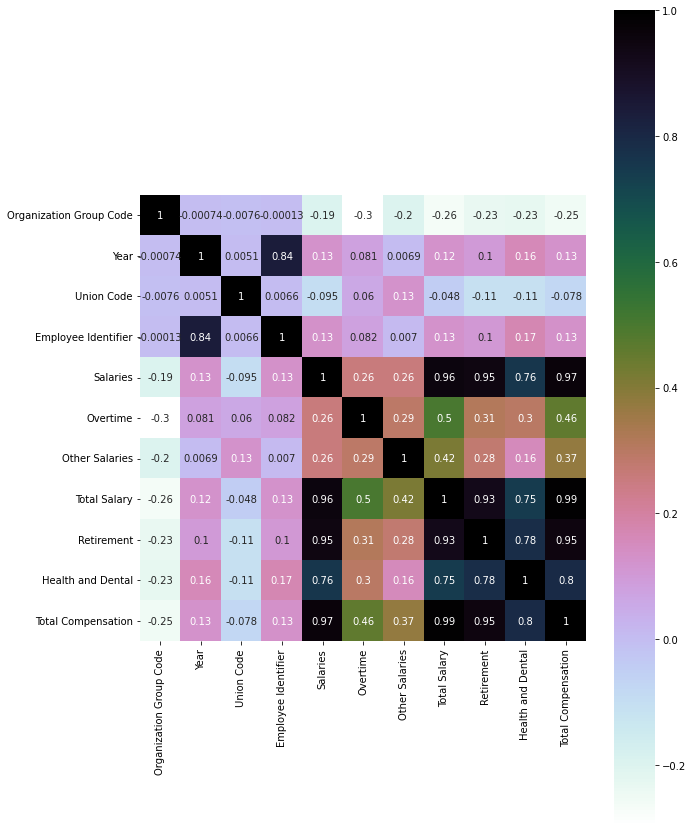

In [77]:
#checking the correlation through heat map 
corr=df.corr()
plt.figure(figsize=(10,15))
sns.heatmap(corr, annot=True,cmap='cubehelix_r',square=True)
plt.show()

In [78]:
df.columns

Index(['Organization Group Code', 'Year', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health and Dental', 'Total Compensation'],
      dtype='object')

In [79]:
#dropping the least correlated columns
df.drop({'Organization Group Code', 'Year', 'Union Code', 'Employee Identifier','Salaries', 'Overtime', 'Other Salaries', 'Total Salary'},axis=1,inplace=True)

In [80]:
df.head()

,Retirement,Health and Dental,Total Compensation
0,11253.16,11961.34,85281.78
1,10284.88,7176.80,79895.32
2,12495.83,12918.24,93649.71
3,19644.45,12918.24,134237.37
4,1083.90,956.91,7512.31


In [81]:
#we are concatenated the columns
df['Health_and_Retirement']=df['Retirement']+df['Health and Dental']

In [82]:
df.head()

,Retirement,Health and Dental,Total Compensation,Health_and_Retirement
0,11253.16,11961.34,85281.78,23214.50
1,10284.88,7176.80,79895.32,17461.68
2,12495.83,12918.24,93649.71,25414.07
3,19644.45,12918.24,134237.37,32562.69
4,1083.90,956.91,7512.31,2040.81


In [83]:
#dropping the extra columns
df.drop({"Retirement",'Health and Dental'},axis=1,inplace=True)

In [84]:
#cleaned the dataset
df.head()

,Total Compensation,Health_and_Retirement
0,85281.78,23214.50
1,79895.32,17461.68
2,93649.71,25414.07
3,134237.37,32562.69
4,7512.31,2040.81


In [85]:
#checking the shape
df.shape

(682919, 2)

In [86]:
#preprocessing the data by scaling
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df)
print(scaled)

[[0.18074512 0.32026192]
 [0.174636   0.28603925]
 [0.19023571 0.33334684]
 ...
 [0.2419989  0.3864561 ]
 [0.27050626 0.4169251 ]
 [0.27164402 0.4169251 ]]


In [87]:
from sklearn.cluster import KMeans

In [88]:
from scipy.spatial.distance import cdist, pdist

In [89]:
#checking for the proper K value by using Elbow Method
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X= df
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

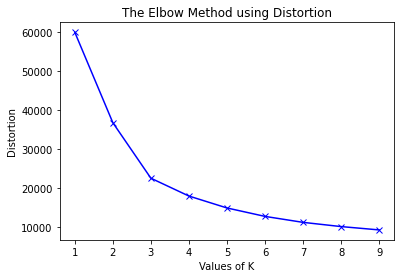

In [90]:
#plotting the Elbow Method
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [93]:
#fitting the model
kmeans=KMeans(n_clusters=3)
y=kmeans.fit(df)

In [94]:
y=kmeans.predict(df)

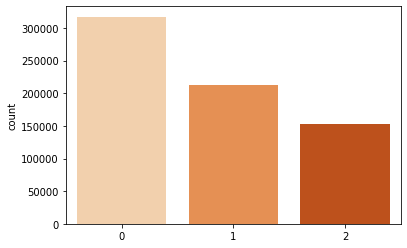

In [96]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()